# Pandas, Sklearn, and Feature Encoding

When we want to build a model using Scikit-Learn, we need a *feature matrix* and one or more *target vectors*

`DataFrame` and `Series` objects do a great job a feature matrices and target vectors.

One restriction in many of the Scikit-Learn algorithms, however, is that all the features should be *numerical*, so we need to come up with a way to *encode* them so our algorithms can *exploit* them.

## Dealing with categories

Often we'll get data with categorical data. To convert this to numbers, here are two options we might select:

- Assign arbitrary integers to each category ("label" encoding")
- Create a new column for each category, with either a `1` or a `0` in it ("one-hot" encoding)

Why might we choose one over the other?

## One-hot encoding

If we use one-hot encoding, we can either use the wonderfully-named `pd.get_dummies()` function to create our columns, or we an use a `OneHotEncoder` from Scikit-Learn.

`get_dummies()` is straightforward to use. Let's consider some Sacramento real estate transactions:

In [1]:
import pandas as pd

dat = pd.read_csv('../data/Sacramentorealestatetransactions.csv', parse_dates=['sale_date'])
dat.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21 00:00:00-04:00,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21 00:00:00-04:00,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21 00:00:00-04:00,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21 00:00:00-04:00,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21 00:00:00-04:00,81900,38.519470,-121.435768


Maybe we think that the 'city' is going to be important as a feature. Let's start by looking at the different values it can take on:

In [2]:
dat.city.value_counts()

SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
NORTH HIGHLANDS     21
GALT                21
CARMICHAEL          20
ROCKLIN             17
FOLSOM              17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
CAMERON PARK         9
FAIR OAKS            9
AUBURN               5
WILTON               5
GOLD RIVER           4
ELVERTA              4
POLLOCK PINES        3
GRANITE BAY          3
RANCHO MURIETA       3
WEST SACRAMENTO      3
EL DORADO            2
LOOMIS               2
COOL                 1
GREENWOOD            1
FORESTHILL           1
PENRYN               1
WALNUT GROVE         1
SHINGLE SPRINGS      1
MEADOW VISTA         1
SLOUGHHOUSE          1
DIAMOND SPRINGS      1
GARDEN VALLEY        1
MATHER               1
Name: city, dtype: int64

In [3]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype                                 
---  ------     --------------  -----                                 
 0   street     985 non-null    object                                
 1   city       985 non-null    object                                
 2   zip        985 non-null    int64                                 
 3   state      985 non-null    object                                
 4   beds       985 non-null    int64                                 
 5   baths      985 non-null    int64                                 
 6   sq__ft     985 non-null    int64                                 
 7   type       985 non-null    object                                
 8   sale_date  985 non-null    datetime64[ns, pytz.FixedOffset(-240)]
 9   price      985 non-null    int64                                 
 10  latitude   985 non-null    float64    

We can use `pd.get_dummies()` to create a new `DataFrame`, using one-hot encoding for the columns we specify:

In [4]:
dat_onehot = pd.get_dummies(dat, columns=['city', 'type'])
dat_onehot.head()

,street,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,...,city_SACRAMENTO,city_SHINGLE SPRINGS,city_SLOUGHHOUSE,city_WALNUT GROVE,city_WEST SACRAMENTO,city_WILTON,type_Condo,type_Multi-Family,type_Residential,type_Unkown
0,3526 HIGH ST,95838,CA,2,1,836,2008-05-21 00:00:00-04:00,59222,38.631913,-121.434879,...,1,0,0,0,0,0,0,0,1,0
1,51 OMAHA CT,95823,CA,3,1,1167,2008-05-21 00:00:00-04:00,68212,38.478902,-121.431028,...,1,0,0,0,0,0,0,0,1,0
2,2796 BRANCH ST,95815,CA,2,1,796,2008-05-21 00:00:00-04:00,68880,38.618305,-121.443839,...,1,0,0,0,0,0,0,0,1,0
3,2805 JANETTE WAY,95815,CA,2,1,852,2008-05-21 00:00:00-04:00,69307,38.616835,-121.439146,...,1,0,0,0,0,0,0,0,1,0
4,6001 MCMAHON DR,95824,CA,2,1,797,2008-05-21 00:00:00-04:00,81900,38.519470,-121.435768,...,1,0,0,0,0,0,0,0,1,0


## One-hot all the things! (?)

One downside to using one-hot encoding is the number of columns generated. Too many columns can cause problems for some of the Scikit-Learn algorithms because they lead to very sparse data (not many rows per feature). We'll see how to deal with that shortly. 

In this case, we added 41 new columns:

In [5]:
dat.shape

(985, 12)

In [6]:
dat_onehot.shape

(985, 53)

## `OneHotEncoder`

While `get_dummies` works well, it doesn't fit in 100% with the fit/predict model of the rest of sklearn. If we want to 'train' an encoder with the one hot encoding and then use the *same* encodings for evaluation and prediction, it's best to use a `OneHotEncoder` from sklearn.

A nice side-effect is that we get a *sparse matrix*, which stores the required data more efficiently:

In [7]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()

In [8]:
enc.fit(dat['city type'.split()])

OneHotEncoder()

In [9]:
enc.transform(dat['city type'.split()])

<985x43 sparse matrix of type '<class 'numpy.float64'>'
	with 1970 stored elements in Compressed Sparse Row format>

In [10]:
985*43

42355

# Encoding categorical *targets*

If we're building a classifier, we often want to take categorical data and encode it as integers. Here, we don't need to worry about one-hot encoding (we're not inferring anything based on the *order* of the targets), so we can just use the `sklearn.preprocessing.LabelEncoder`:

In [11]:
crime = pd.read_csv('../data/sfcrime-hackathon/hackathon_train.csv')
crime.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2011-12-04 18:15:00,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Sunday,PARK,NONE,100 Block of BEULAH ST,-122.452331,37.767356
1,2009-01-11 19:57:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Sunday,MISSION,"ARREST, BOOKED",18TH ST / CAPP ST,-122.418272,37.761903
2,2007-01-25 18:15:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,CENTRAL,NONE,1200 Block of STOCKTON ST,-122.408521,37.797492
3,2012-01-10 08:55:00,ROBBERY,"ROBBERY, BODILY FORCE",Tuesday,NORTHERN,NONE,HAYES ST / FRANKLIN ST,-122.421333,37.777090
4,2014-05-27 12:25:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,TENDERLOIN,NONE,JONES ST / TURK ST,-122.412414,37.783004


In [12]:
enc = preprocessing.LabelEncoder()
enc.fit(crime['Category'])

LabelEncoder()

In [13]:
enc.transform(crime['Category'])

array([32, 37, 20, ..., 16, 37, 20])

# Scaling inputs with the StandardScaler

Many algorithms work better if the features have zero mean and standard deviation 1. We can scale them so that this is true by using the `sklearn.preprocessing.StandardScaler`:

In [14]:
dat.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21 00:00:00-04:00,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21 00:00:00-04:00,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21 00:00:00-04:00,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21 00:00:00-04:00,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21 00:00:00-04:00,81900,38.519470,-121.435768


Drop the features we don't care about

In [15]:
X = dat['beds baths sq__ft latitude longitude'.split()]
y = dat['price']

In [16]:
enc = preprocessing.StandardScaler()
Xtrans = enc.fit_transform(X)

In [17]:
Xtrans

array([[-0.69738954, -0.86784575, -0.56170333,  0.16635301, -0.57085654],
       [ 0.06756447, -0.86784575, -0.17348596, -0.8862888 , -0.54299268],
       [-0.69738954, -0.86784575, -0.60861782,  0.07273654, -0.63568651],
       ...,
       [ 0.06756447,  0.24957656, -0.11601571,  0.69546356,  0.71761011],
       [ 0.83251847,  0.24957656,  0.43405664, -1.31214468, -0.29985136],
       [ 0.06756447,  0.24957656,  0.05522216,  0.32686591,  2.02642295]])

# PCA for dimensionality reduction

Too many features can decrease the quality of our model. PCA is a transformation that reduces the # of dimensions while keeping as much *variance* in our features as possible. Sometimes it can be useful in transforming one-hot encoded data:

In [18]:
dat_onehot.head()

,street,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,...,city_SACRAMENTO,city_SHINGLE SPRINGS,city_SLOUGHHOUSE,city_WALNUT GROVE,city_WEST SACRAMENTO,city_WILTON,type_Condo,type_Multi-Family,type_Residential,type_Unkown
0,3526 HIGH ST,95838,CA,2,1,836,2008-05-21 00:00:00-04:00,59222,38.631913,-121.434879,...,1,0,0,0,0,0,0,0,1,0
1,51 OMAHA CT,95823,CA,3,1,1167,2008-05-21 00:00:00-04:00,68212,38.478902,-121.431028,...,1,0,0,0,0,0,0,0,1,0
2,2796 BRANCH ST,95815,CA,2,1,796,2008-05-21 00:00:00-04:00,68880,38.618305,-121.443839,...,1,0,0,0,0,0,0,0,1,0
3,2805 JANETTE WAY,95815,CA,2,1,852,2008-05-21 00:00:00-04:00,69307,38.616835,-121.439146,...,1,0,0,0,0,0,0,0,1,0
4,6001 MCMAHON DR,95824,CA,2,1,797,2008-05-21 00:00:00-04:00,81900,38.519470,-121.435768,...,1,0,0,0,0,0,0,0,1,0


In [19]:
dat_onehot.columns

Index(['street', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'sale_date',
       'price', 'latitude', 'longitude', 'city_ANTELOPE', 'city_AUBURN',
       'city_CAMERON PARK', 'city_CARMICHAEL', 'city_CITRUS HEIGHTS',
       'city_COOL', 'city_DIAMOND SPRINGS', 'city_EL DORADO',
       'city_EL DORADO HILLS', 'city_ELK GROVE', 'city_ELVERTA',
       'city_FAIR OAKS', 'city_FOLSOM', 'city_FORESTHILL', 'city_GALT',
       'city_GARDEN VALLEY', 'city_GOLD RIVER', 'city_GRANITE BAY',
       'city_GREENWOOD', 'city_LINCOLN', 'city_LOOMIS', 'city_MATHER',
       'city_MEADOW VISTA', 'city_NORTH HIGHLANDS', 'city_ORANGEVALE',
       'city_PENRYN', 'city_PLACERVILLE', 'city_POLLOCK PINES',
       'city_RANCHO CORDOVA', 'city_RANCHO MURIETA', 'city_RIO LINDA',
       'city_ROCKLIN', 'city_ROSEVILLE', 'city_SACRAMENTO',
       'city_SHINGLE SPRINGS', 'city_SLOUGHHOUSE', 'city_WALNUT GROVE',
       'city_WEST SACRAMENTO', 'city_WILTON', 'type_Condo',
       'type_Multi-Family', 'type_Residential', 

In [20]:
X = dat_onehot[
    'beds baths sq__ft latitude longitude'.split()
    + list(dat_onehot.columns[10:])
]
y = dat_onehot['price']

In [21]:
X.head()

,beds,baths,sq__ft,latitude,longitude,city_ANTELOPE,city_AUBURN,city_CAMERON PARK,city_CARMICHAEL,city_CITRUS HEIGHTS,...,city_SACRAMENTO,city_SHINGLE SPRINGS,city_SLOUGHHOUSE,city_WALNUT GROVE,city_WEST SACRAMENTO,city_WILTON,type_Condo,type_Multi-Family,type_Residential,type_Unkown
0,2,1,836,38.631913,-121.434879,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,3,1,1167,38.478902,-121.431028,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,2,1,796,38.618305,-121.443839,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,2,1,852,38.616835,-121.439146,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,2,1,797,38.519470,-121.435768,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [22]:
from sklearn.decomposition import PCA

In [23]:
enc = preprocessing.StandardScaler()
pca = PCA()
enc.fit(X)
Xtrans = enc.transform(X)
pca.fit(Xtrans)

PCA()

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

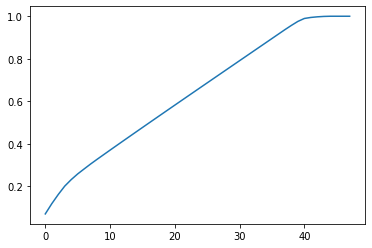

In [25]:
plt.plot(pca.explained_variance_ratio_.cumsum())

In [26]:
Xtrans.shape

(985, 48)

If we want to capture 80% of the variance, we can tell PCA to do just that:

In [27]:
enc = preprocessing.StandardScaler()
pca = PCA(0.8)
Xtrans = enc.fit_transform(X)
Xtrans_pca = pca.fit_transform(Xtrans)

In [28]:
Xtrans_pca.shape

(985, 32)